<a href="https://colab.research.google.com/github/Olga-1911/Developing_a_fully_connected_neural_network/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B0%D0%B1_%D1%80%D0%B0%D0%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 2

**Разработка полностью связанной нейронной сети**

1. Для выполнения практических работ курса я выбрала библиотеку TensorFlow с модулем Keras из-за простоты использования и встроенной поддержки в Google Colab.

2. Поскольку в Google Colab уже доступна библиотека TensorFlow, ее установка не требуется. Проверим, какая версия установлена, чтобы проверить, действительно ли она установлена.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


3. Проверим корректность установки. Для этого создадим скрипт с простейшей моделью (логистическая регрессия) для классификации рукописных цифр из набора MNIST.

Epoch 1/5
422/422 - 3s - 7ms/step - accuracy: 0.8246 - loss: 0.7119 - val_accuracy: 0.9118 - val_loss: 0.3531
Epoch 2/5
422/422 - 2s - 5ms/step - accuracy: 0.8989 - loss: 0.3769 - val_accuracy: 0.9260 - val_loss: 0.2864
Epoch 3/5
422/422 - 3s - 7ms/step - accuracy: 0.9092 - loss: 0.3305 - val_accuracy: 0.9297 - val_loss: 0.2613
Epoch 4/5
422/422 - 2s - 5ms/step - accuracy: 0.9144 - loss: 0.3093 - val_accuracy: 0.9302 - val_loss: 0.2501
Epoch 5/5
422/422 - 1s - 3ms/step - accuracy: 0.9179 - loss: 0.2965 - val_accuracy: 0.9320 - val_loss: 0.2436


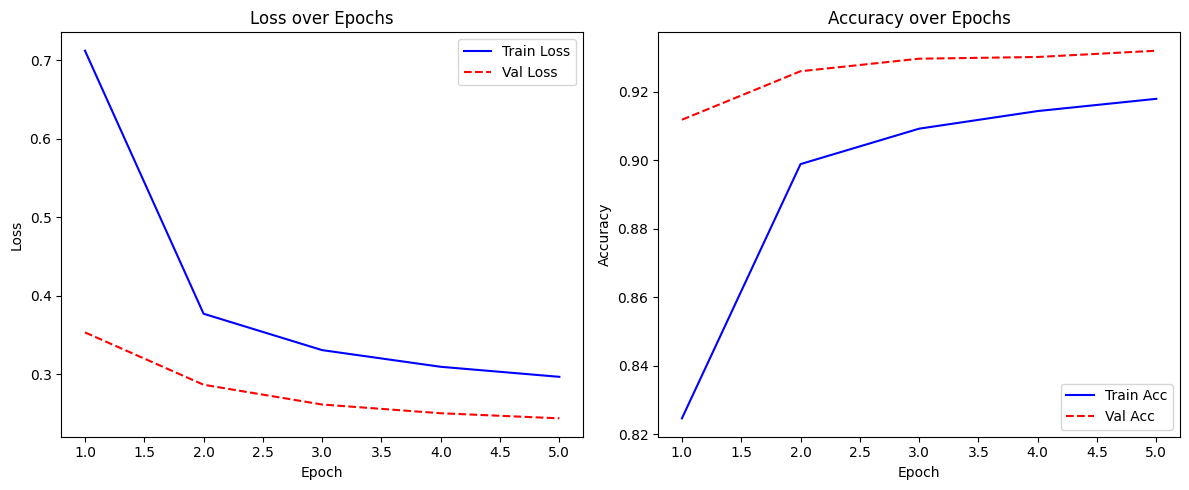

Test accuracy: 0.9210, Test loss: 0.2823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


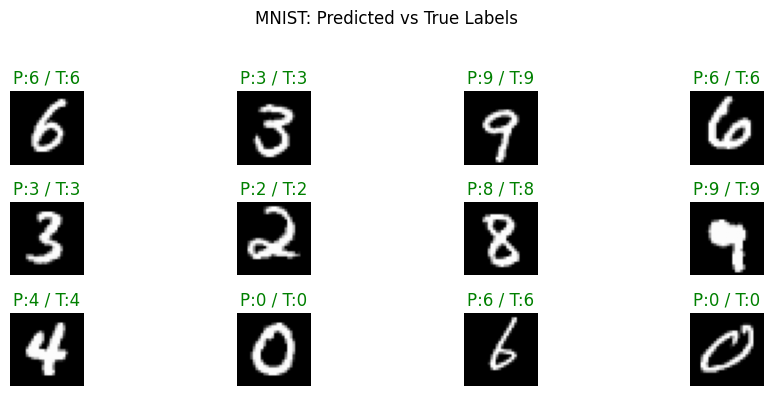

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Загружаем и предобрабатываем данные MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Сохраним копию необработанных изображений для визуализации
x_test_orig = x_test.copy()

# Делим на обучающие и тестовые, разворачиваем 28×28 → 784 вектора и нормируем
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# Преобразуем метки в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Строим модель логистической регрессии (однослойная сеть)
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели с использованием алгоритма оптимизации Adam (адаптивный градиентный спуск)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель и сохраняем историю
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# Визуализация loss & accuracy
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'],   'b-', label='Train Loss')
plt.plot(epochs, history.history['val_loss'], 'r--', label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'],   'b-', label='Train Acc')
plt.plot(epochs, history.history['val_accuracy'], 'r--', label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Оценка на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

# Визуализация предсказаний
num_samples = 12
indices = np.random.choice(len(x_test), num_samples, replace=False)
preds = model.predict(x_test[indices])
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test[indices], axis=1)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test_orig[idx], cmap='gray')
    color = 'green' if pred_labels[i] == true_labels[i] else 'red'
    plt.title(f"P:{pred_labels[i]} / T:{true_labels[i]}", color=color)
    plt.axis('off')

plt.suptitle('MNIST: Predicted vs True Labels')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Библиотека установлена корректно, а базовая модель обучается на простом наборе данных.

Доля правильно классифицированных изображений на тестовой выборке 92,10%, это говорит о хорошей способности модели распознавать цифры MNIST.

Значение функции потерь (categorical_crossentropy) на тех же данных. Кросс-энтропия показывает насколько прогнозируемые вероятности отличаются от идеального one-hot распределения. Test loss = 0,2823 - это типичное значение для простой однослойной сети, указывающее на умеренную неуверенность в некоторых предсказаниях.

4. Для выполнения практических работ я выбрала практическую задачу компьютерного зрения - задачу классификации изображений из набора данных CIFAR-10.

На входе: цветное изображение (RGB) размером 32x32 пикселя.

На выходе: метка одного из 10 классов: самолет, автомобиль, птица, кошка, олень, собака, лягушка, лошадь, корабль, грузовик.

Набор данных содержит 60 000 изображений (50 000 тренировочных, 10 000 тестовых).


5. Произведем разработку программ/скриптов для подготовки тренировочных и тестовых данных в формате, который обрабатывается выбранной библиотекой.


Набор данных CIFAR-10 содержит 50,000 обучающих и 10,000 тестовых изображений.

Мы загрузим данные через TensorFlow, нормализуем их и преобразуем в формат, подходящий для полностью связанных нейронных сетей.

In [ ]:
import tensorflow as tf
import numpy as np

# Загрузка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование изображений в векторы
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))  # 3072
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))    # 3072

# Преобразование меток в категориальный формат
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Проверка размеров данных
print(f"Размер обучающей выборки: {x_train.shape}")
print(f"Размер тестовой выборки: {x_test.shape}")
print(f"Размер обучающих меток: {y_train.shape}")
print(f"Размер тестовых меток: {y_test.shape}")
print(f"Пример первых 5 меток (классы): {np.argmax(y_train[:5], axis=1)}")
print(f"Пример первых 5 one-hot меток:\n{y_train[:5]}")

Размер обучающей выборки: (50000, 3072)
Размер тестовой выборки: (10000, 3072)
Размер обучающих меток: (50000, 10)
Размер тестовых меток: (10000, 10)
Пример первых 5 меток (классы): [6 9 9 4 1]
Пример первых 5 one-hot меток:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


В обучающей выборке 50 000 обучающих примеров, каждый представляет собой вектор из 3072 чисел.

В тестовой выборке 10 000 обучающих примеров, каждый представляет собой вектор из 3072 чисел.

Первые пять меток (например, 6 = лягушка, 9 = грузовик, 4 = олень, 1 = автомобиль).


Классы: Самолёт (0), автомобиль (1), птица (2), кошка (3), олень (4), собака (5), лягушка (6), лошадь (7), корабль (8), грузовик (9).

6. Произведем разработку архитектур 3-х нейронных сетей

**Модель 1**: 1 скрытый слой (512 нейронов, активация ReLU), простая модель, подходит для быстрого обучения; ReLU добавляет нелинейность.

**Модель 2**: 2 скрытых слоя (1024 и 512 нейронов, ReLU), более сложная, с большей вычислительной мощностью; 2 скрытых слоя для большей выразительности.

**Модель 3**: 3 скрытых слоя (2048, 1024, 512 нейронов, ReLU), самая глубокая, с комбинацией активаций для разнообразия; 3 скрытых слоя для максимальной сложности; Dropout (0,3) после каждого слоя для повышения точности.


7. Произведем обучение разработанных глубоких моделей.

Обучение выполняется в функции train_model для каждой модели.

8. Проведем также тестирование обученных глубоких моделей.  Рассмотрим результаты тестирования и сформируем выводы относительно разработанных архитектур.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import time

Проведем обучение и тестирование Модели 1.

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.2683 - loss: 2.1958 - val_accuracy: 0.3460 - val_loss: 1.8209
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3717 - loss: 1.7591 - val_accuracy: 0.3884 - val_loss: 1.7223
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4020 - loss: 1.6782 - val_accuracy: 0.4069 - val_loss: 1.6804
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4278 - loss: 1.6141 - val_accuracy: 0.4261 - val_loss: 1.6295
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4460 - loss: 1.5735 - val_accuracy: 0.4151 - val_loss: 1.6520
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4550 - loss: 1.5408 - val_accuracy: 0.4490 - val_loss: 1.5747
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4640 - loss: 1.5101 - val_accuracy: 0.4209 - val_loss: 1.6586
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4728 - loss: 1.4874 - 

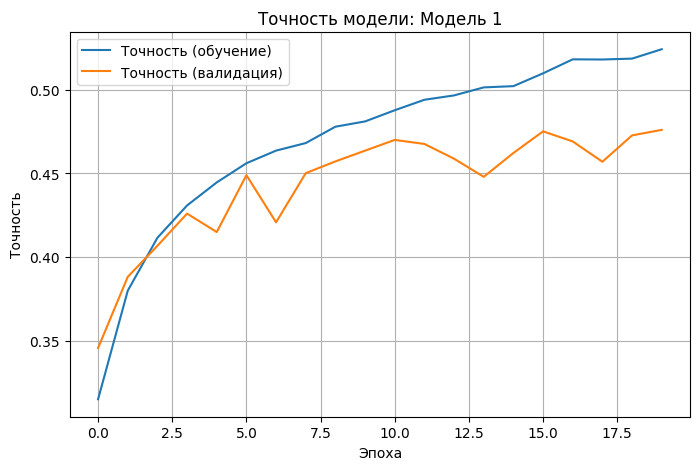

In [ ]:
# Функция для обучения и тестирования модели
def train_model(model, model_name, x_train, y_train, x_test, y_test, epochs=20):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Обучение с измерением времени
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64,
                        validation_split=0.2, verbose=1)
    training_time = time.time() - start_time

    # Оценка на тестовых данных
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Извлечение итоговой обучающей и валидационной точности
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    # Вывод результатов
    print(f"\n{model_name}:")
    print(f"Время обучения: {training_time:.2f} секунд")
    print(f"Итоговая обучающая точность: {train_accuracy:.4f}")
    print(f"Итоговая валидационная точность: {val_accuracy:.4f}")
    print(f"Точность на тестовых данных: {test_accuracy:.4f}")

    # Визуализация процесса обучения
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Точность (обучение)')
    plt.plot(history.history['val_accuracy'], label='Точность (валидация)')
    plt.title(f'Точность модели: {model_name}')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_accuracy.png')
    plt.show()

    return history, test_accuracy, val_accuracy, train_accuracy, training_time

# Модель 1: 1 скрытый слой
model1 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),
    layers.Dense(10, activation='softmax')
])

# Обучение и тестирование Модели 1
history1, test_acc1, val_acc1, train_acc1, training_time1 = train_model(
    model1, "Модель 1", x_train, y_train, x_test, y_test, epochs=20
)

# Сохранение результатов
model1_results = {
    'name': "Модель 1",
    'training_time': training_time1,
    'train_accuracy': train_acc1,
    'val_accuracy': val_acc1,
    'test_accuracy': test_acc1
}

Проведем обучение и тестирование Модели 2.

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.2604 - loss: 2.1511 - val_accuracy: 0.3539 - val_loss: 1.7761
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.3852 - loss: 1.7216 - val_accuracy: 0.4020 - val_loss: 1.6679
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.4281 - loss: 1.6085 - val_accuracy: 0.4409 - val_loss: 1.5980
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4549 - loss: 1.5274 - val_accuracy: 0.4350 - val_loss: 1.5832
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.4658 - loss: 1.4937 - val_accuracy: 0.4578 - val_loss: 1.5345
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4812 - loss: 1.4490 - val_accuracy: 0.4710 - val_loss: 1.4964
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4890 - loss: 1.4227 - val_accuracy: 0.4719 - val_loss: 1.4948
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.5037 - loss: 1.3872 - 

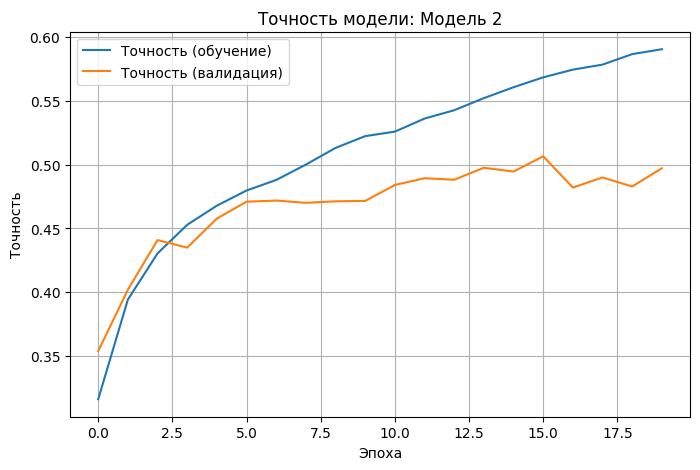

In [ ]:
# Модель 2: 2 скрытых слоя
model2 = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(3072,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Обучение и тестирование Модели 2
history2, test_acc2, val_acc2, train_acc2, training_time2 = train_model(
    model2, "Модель 2", x_train, y_train, x_test, y_test, epochs=20
)

# Сохранение результатов
model2_results = {
    'name': "Модель 2",
    'training_time': training_time2,
    'train_accuracy': train_acc2,
    'val_accuracy': val_acc2,
    'test_accuracy': test_acc2
}

Проведем обучение и тестирование Модели 3.

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 178ms/step - accuracy: 0.1886 - loss: 2.3091 - val_accuracy: 0.2997 - val_loss: 1.9031
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 172ms/step - accuracy: 0.2821 - loss: 1.9445 - val_accuracy: 0.3381 - val_loss: 1.8476
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 177ms/step - accuracy: 0.3141 - loss: 1.8792 - val_accuracy: 0.3554 - val_loss: 1.8174
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.3243 - loss: 1.8406 - val_accuracy: 0.3606 - val_loss: 1.7975
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.3335 - loss: 1.8225 - val_accuracy: 0.3525 - val_loss: 1.8155
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 173ms/step - accuracy: 0.3307 - loss: 1.8187 - val_accuracy: 0.3649 - val_loss: 1.7781
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 170ms/step - accuracy: 0.3472 - loss: 1.7954 - val_accuracy: 0.3830 - val_loss: 1.7519
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 173ms/step - accuracy: 0.3544 -

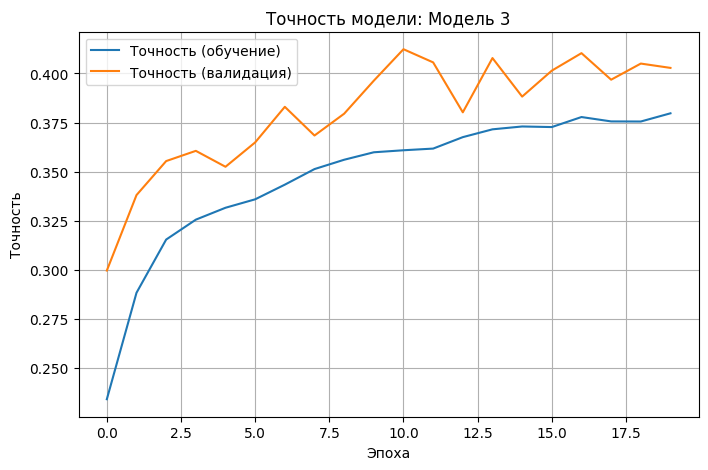

In [ ]:
# Модель 3: 3 скрытых слоя с Dropout
model3 = models.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(3072,)),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Обучение и тестирование Модели 3
history3, test_acc3, val_acc3, train_acc3, training_time3 = train_model(
    model3, "Модель 3", x_train, y_train, x_test, y_test, epochs=20
)

# Сохранение результатов
model3_results = {
    'name': "Модель 3",
    'training_time': training_time3,
    'train_accuracy': train_acc3,
    'val_accuracy': val_acc3,
    'test_accuracy': test_acc3
}

Сравненим полученные результаты работы трех моделей.

Для этого сведем данные в таблицу и построим сравнительный график, используя сохранённые истории (history1, history2, history3).


Результаты экспериментов:
       name  training_time  train_accuracy  val_accuracy  test_accuracy
0  Модель 1     477.680711        0.524050        0.4760         0.4842
1  Модель 2    1280.968456        0.590525        0.4972         0.5002
2  Модель 3    2672.024653        0.379700        0.4028         0.4042


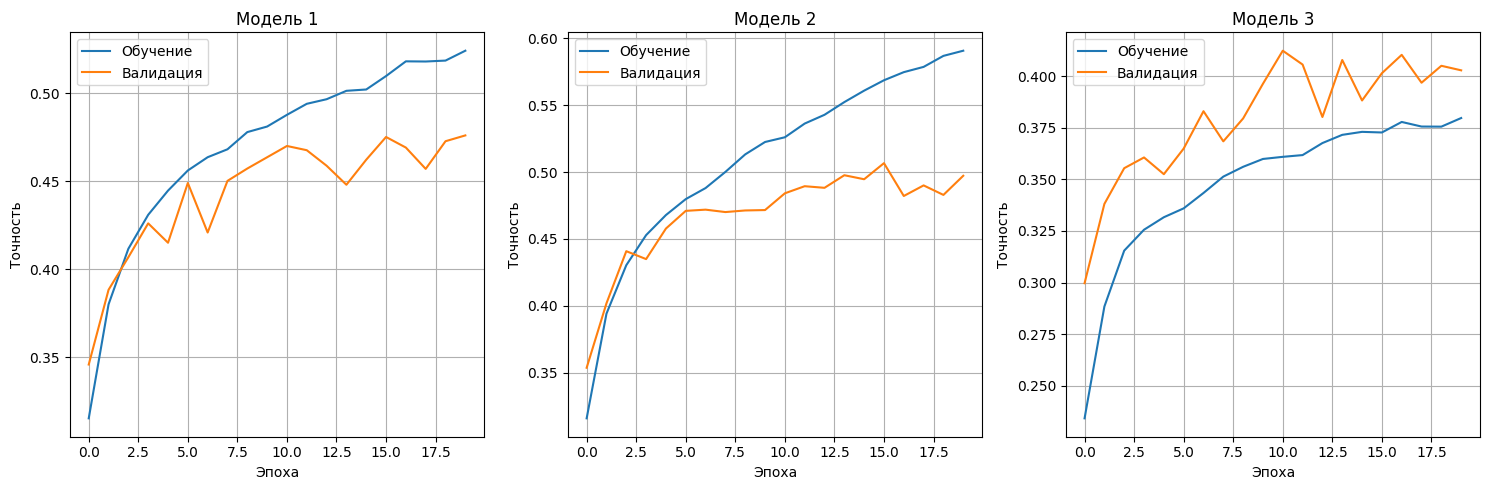

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Сбор всех результатов
results = [model1_results, model2_results, model3_results]

# Вывод результатов в таблице
df_results = pd.DataFrame(results)
print("\nРезультаты экспериментов:")
print(df_results[['name', 'training_time', 'train_accuracy', 'val_accuracy', 'test_accuracy']])

# Сравнительный график для всех моделей
plt.figure(figsize=(15, 5))

# Модель 1
plt.subplot(1, 3, 1)
plt.plot(history1.history['accuracy'], label='Обучение')
plt.plot(history1.history['val_accuracy'], label='Валидация')
plt.title("Модель 1")
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# Модель 2
plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'], label='Обучение')
plt.plot(history2.history['val_accuracy'], label='Валидация')
plt.title("Модель 2")
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# Модель 3
plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'], label='Обучение')
plt.plot(history3.history['val_accuracy'], label='Валидация')
plt.title("Модель 3")
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('comparison_accuracy.png')
plt.show()

Для визуализации предсказаний каждой модели посмотрим на 5 случайных тестовых изображениях истинные и предсказанные классы, а также вероятности.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


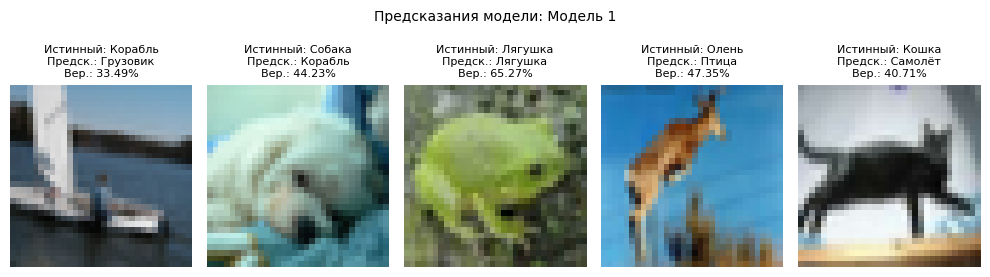

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


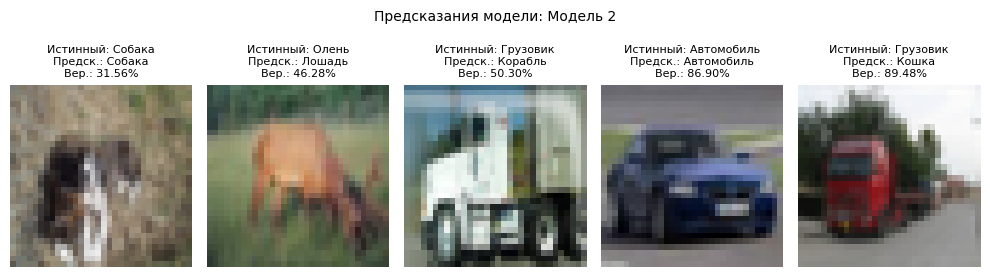

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


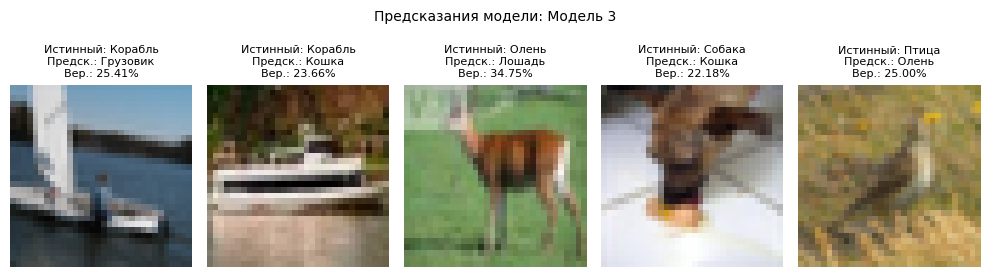

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Названия классов CIFAR-10
class_names = ['Самолёт', 'Автомобиль', 'Птица', 'Кошка', 'Олень',
               'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

# Функция для визуализации предсказаний
def visualize_predictions(model, model_name, x_test, y_test, class_names, num_images=5):
    # Выбираем случайные индексы
    indices = np.random.choice(x_test.shape[0], num_images, replace=False)
    images = x_test[indices].reshape(num_images, 32, 32, 3)  # Преобразуем обратно в изображения
    true_labels = np.argmax(y_test[indices], axis=1)  # Преобразуем one-hot метки в классы

    # Получаем предсказания
    predictions = model.predict(x_test[indices])
    pred_labels = np.argmax(predictions, axis=1)
    pred_probs = np.max(predictions, axis=1)

    # Создаём график
    plt.figure(figsize=(10, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Истинный: {class_names[true_labels[i]]}\n'
                  f'Предск.: {class_names[pred_labels[i]]}\n'
                  f'Вер.: {pred_probs[i]:.2%}', fontsize=8)
        plt.axis('off')
    plt.suptitle(f'Предсказания модели: {model_name}', fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{model_name}_predictions.png', dpi=300)
    plt.show()

# Визуализация предсказаний для всех моделей
models_list = [(model1, "Модель 1"), (model2, "Модель 2"), (model3, "Модель 3")]
for model, name in models_list:
    visualize_predictions(model, name, x_test, y_test, class_names, num_images=5)